# Processing of the results

First some imports

In [1]:
import os

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

### Result Consolidation
Next, we read all finalized CSV files from the given input directories and concatenate them into one DataFrame:

In [2]:
# Some variables used over the whole notebook
sample = "eros"
output_directory = Path(f"./results/{sample}")
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    [
        Path(f"./results/{sample}/re-validation")
    ],
    include=["validation_final_result.csv", "results.csv"],
    exclude=["validation_results.csv"]
)
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,pretrained_model,resolution
0,eros,results/polyhedral-total-eros-seed-99,26,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.446768,1.163550,4.699235,1.222578,1.813030,1.214743,5.718293,1.258933,NaN,NaN
1,eros,results/polyhedral-total-eros-seed-99,31,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.207714,0.958881,4.464620,1.140942,0.809306,0.558336,2.972985,0.698491,NaN,NaN
2,eros,results/polyhedral-total-eros-seed-99,18,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.005417,0.004296,0.021454,0.005370,0.023616,0.015246,0.164545,0.034054,NaN,NaN
3,eros,results/polyhedral-total-eros-seed-99,29,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.282486,1.028557,4.604361,1.191101,0.881923,0.607330,3.190247,0.745135,NaN,NaN
4,eros,results/polyhedral-total-eros-seed-99,34,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.190134,0.953286,4.397669,1.136690,0.979574,0.675245,3.457541,0.810319,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,eros,results/polyhedral-total-eros-seed-3,1,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.889505,0.766346,3.095020,0.945022,0.992113,0.681460,3.531626,0.828295,NaN,NaN
428,eros,results/polyhedral-total-eros-seed-3,5,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.256108,1.033985,4.222020,1.151814,1.454208,0.985824,4.782611,1.082245,NaN,NaN
429,eros,results/polyhedral-total-eros-seed-3,12,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.006170,0.004763,0.024761,0.005994,0.021367,0.013782,0.131024,0.027492,NaN,NaN
430,eros,results/polyhedral-total-eros-seed-3,11,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.923466,0.795087,3.192616,0.974189,1.055122,0.723825,3.763654,0.879144,NaN,NaN


In [4]:
# Replace resolution in-place with "10%" if column "low_resolution" has value True and drop the unnecessary column
if "low_resolution" in df.columns:
    df["low_resolution"].fillna(False, inplace=True)
    df.loc[df["low_resolution"], "resolution"] = "10%"
    df.drop("low_resolution", axis=1, inplace=True)
df["resolution"].fillna("100%", inplace=True)

# Adapt the line pretrained_model to the new format
df["pretrained_model"].fillna("None", inplace=True)
df.loc[df["pretrained_model"].str.contains("pretrain-3"), "pretrained_model"] = "0.1%"
df.loc[df["pretrained_model"].str.contains("pretrain-2"), "pretrained_model"] = "1%"
df.loc[df["pretrained_model"].str.contains("pretrain-0|pretrain-1"), "pretrained_model"] = "10%"

# c refers to the last model, not the first and can be re-calculated --> drop it
df.drop(["c"], axis=1, inplace=True)

In [5]:
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,pretrained_model,resolution
0,eros,results/polyhedral-total-eros-seed-99,26,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.446768,1.163550,4.699235,1.222578,1.813030,1.214743,5.718293,1.258933,None,100%
1,eros,results/polyhedral-total-eros-seed-99,31,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.207714,0.958881,4.464620,1.140942,0.809306,0.558336,2.972985,0.698491,None,100%
2,eros,results/polyhedral-total-eros-seed-99,18,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.005417,0.004296,0.021454,0.005370,0.023616,0.015246,0.164545,0.034054,None,100%
3,eros,results/polyhedral-total-eros-seed-99,29,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.282486,1.028557,4.604361,1.191101,0.881923,0.607330,3.190247,0.745135,None,100%
4,eros,results/polyhedral-total-eros-seed-99,34,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.190134,0.953286,4.397669,1.136690,0.979574,0.675245,3.457541,0.810319,None,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,eros,results/polyhedral-total-eros-seed-3,1,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.889505,0.766346,3.095020,0.945022,0.992113,0.681460,3.531626,0.828295,None,100%
428,eros,results/polyhedral-total-eros-seed-3,5,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.256108,1.033985,4.222020,1.151814,1.454208,0.985824,4.782611,1.082245,None,100%
429,eros,results/polyhedral-total-eros-seed-3,12,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.006170,0.004763,0.024761,0.005994,0.021367,0.013782,0.131024,0.027492,None,100%
430,eros,results/polyhedral-total-eros-seed-3,11,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.923466,0.795087,3.192616,0.974189,1.055122,0.723825,3.763654,0.879144,None,100%


And then we save the unified DataFrame to a CSV file, which can be uploaded to the repository since it contains everything in a readable nice format:

In [6]:
filename = f"total_results_{sample}.csv"
df.to_csv(output_directory.joinpath(filename), index=False)

# Processing and Data Visualization

This step uses the previously created CSV file to create a DataFrame that is easier to work with and independent of the used input directories. Start here, if you just have the file with all results.

In [7]:
filename = f"total_results_{sample}.csv"
df = pd.read_csv(output_directory.joinpath(filename))
df_copy = df.copy()

In [8]:
interesting_columns = ["sample", "pretrained_model", "seed", "ground_truth", "resolution", "sample_domain", "noise", "iterations", "integration_points"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,eros,None,99,mascon,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",10000,300000,1.331091,1.300844,1.294245,1.232566,1.175298,0.830666,0.451819,0.101941,0.052593,1.095594e-02
1,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",10000,300000,0.862725,1.404204,0.800138,0.621995,0.531549,0.347436,0.049330,0.003652,0.001881,3.914485e-04
2,eros,None,99,mascon,100%,"[0.0, 1.0]",[''],10000,300000,0.093804,0.024949,0.017999,0.004886,0.002689,0.001690,0.002060,0.000150,0.000072,1.441354e-05
3,eros,None,99,mascon,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",10000,300000,0.847905,1.397754,0.887572,0.798655,0.612974,0.392887,0.054237,0.000020,0.000009,1.841422e-06
4,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",10000,300000,0.763746,1.435138,0.845480,1.066218,0.691706,0.418205,0.145771,0.011628,0.005968,1.232865e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,eros,None,3,polyhedral,100%,"[1.0, 3.0]",[''],10000,300000,1.010776,0.718243,0.883200,0.707824,0.766274,0.376620,0.020085,0.000004,0.000002,6.199812e-07
428,eros,None,3,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.009337]",10000,300000,1.098436,1.098993,1.256242,1.251710,0.948011,0.722054,0.351848,0.005643,0.002047,3.512769e-04
429,eros,None,3,polyhedral,100%,"[0.0, 1.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",10000,300000,0.040371,0.125750,0.018400,0.006065,0.003612,0.001654,0.001657,0.000157,0.000074,1.464508e-05
430,eros,None,3,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",10000,300000,1.072323,0.867109,0.938013,0.838659,0.795835,0.433316,0.045960,0.000016,0.000004,8.147241e-07


Time to replace the altitudes and make them more readable:

In [9]:
ALTITUDES = ast.literal_eval(df_copy.at[0, "validation_sampling_altitudes"])
print("The normalized altitudes are:")
print(ALTITUDES)
print("The converted altitudes to [km] are:")
print(unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='km'))

The normalized altitudes are:
[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
The converted altitudes to [km] are:
[2.04138649e-02 1.02069324e-01 2.04138649e-01 1.02069324e+00
 2.04138649e+00 1.02069324e+01 2.04138649e+01 1.02069324e+02
 2.04138649e+02 1.02069324e+03]


In [10]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,eros,None,99,mascon,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",10000,300000,1.331091,1.300844,1.294245,1.232566,1.175298,0.830666,0.451819,0.101941,0.052593,1.095594e-02
1,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",10000,300000,0.862725,1.404204,0.800138,0.621995,0.531549,0.347436,0.049330,0.003652,0.001881,3.914485e-04
2,eros,None,99,mascon,100%,"[0.0, 1.0]",[''],10000,300000,0.093804,0.024949,0.017999,0.004886,0.002689,0.001690,0.002060,0.000150,0.000072,1.441354e-05
3,eros,None,99,mascon,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",10000,300000,0.847905,1.397754,0.887572,0.798655,0.612974,0.392887,0.054237,0.000020,0.000009,1.841422e-06
4,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",10000,300000,0.763746,1.435138,0.845480,1.066218,0.691706,0.418205,0.145771,0.011628,0.005968,1.232865e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,eros,None,3,polyhedral,100%,"[1.0, 3.0]",[''],10000,300000,1.010776,0.718243,0.883200,0.707824,0.766274,0.376620,0.020085,0.000004,0.000002,6.199812e-07
428,eros,None,3,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.009337]",10000,300000,1.098436,1.098993,1.256242,1.251710,0.948011,0.722054,0.351848,0.005643,0.002047,3.512769e-04
429,eros,None,3,polyhedral,100%,"[0.0, 1.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",10000,300000,0.040371,0.125750,0.018400,0.006065,0.003612,0.001654,0.001657,0.000157,0.000074,1.464508e-05
430,eros,None,3,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",10000,300000,1.072323,0.867109,0.938013,0.838659,0.795835,0.433316,0.045960,0.000016,0.000004,8.147241e-07


In [11]:
unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='m')

array([2.04138649e+01, 1.02069324e+02, 2.04138649e+02, 1.02069324e+03,
       2.04138649e+03, 1.02069324e+04, 2.04138649e+04, 1.02069324e+05,
       2.04138649e+05, 1.02069324e+06])

In [12]:
df = df.drop(
    ["sample", "seed"], axis=1
)
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df["iterations"] = df["iterations"].apply(lambda x: str(x))


# Melt columns "ground_truth" and "pretrained_model" into one column called "training_type"
df["training_type"] = df["ground_truth"] + " (" + df["pretrained_model"] + ", " + df["iterations"] + ")"
df.drop(["ground_truth", "pretrained_model", "iterations"], axis=1, inplace=True)

# Just select those columns with resolution 100% and drop the resolution column
df = df[df["resolution"] == "100%"]
df.drop("resolution", axis=1, inplace=True)

df.groupby(["sample_domain", "noise", "training_type"]).mean()

integration_points  \
sample_domain noise                                              training_type                                  
[0. 1.]       ['']                                               mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.001]                 mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.01]                  mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.1]                   mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['gaussian', 0.0, 0.009337]                        mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['gaussian', 0.0, 0.093371]                        mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
[1. 3.]       ['']                                               mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.001]                 mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.01]                  mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.1]                   mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['gaussian', 0.0, 0.009337]                        mascon (None, 10000)                300000.0   
                                                                 polyhedral (None, 10000)            300000.0   
              ['gaussia

Time for plotting. First make the DataFrame wide

In [13]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["sample_domain", "noise", "training_type"], str_altitudes, var_name="Distance", value_name=error_of_interest)


dfm = dfm[dfm["noise"] != "['combined', 0.0, 0.009337, [9.79917e-05, 0.0, 0.0]]"]
dfm = dfm[dfm["noise"] != "['combined', 0.0, 0.093371, [9.79917e-05, 0.0, 0.0]]"]


noise_replacement = {
    "['']" : "No Noise",
    "['constant_bias', [9.79917e-05, 0.0, 0.0]]": "Constant Bias $c = 9.799 \cdot 10^{-5}$",
    "['gaussian', 0.0, 0.009337]": "Additive Gaussian $\mu = 0 \; \sigma= 0.009$",
    "['gaussian', 0.0, 0.093371]": "Additive Gaussian $\mu = 0 \; \sigma= 0.093$",
    "['adaptive_gaussian_noise', 0.001]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.001$",
    "['adaptive_gaussian_noise', 0.01]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$",
    "['adaptive_gaussian_noise', 0.1]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$"
}

sample_distance_replacement = {
    "[0. 1.]": "$(0, 1)$",
    "[1. 3.]": "$(1, 3)$",
    "[3. 5.]": "$(3, 5)$",
}

for key, replacement in noise_replacement.items():
     dfm["noise"].replace(key, replacement, inplace=True)

for key, replacement in sample_distance_replacement.items():
    dfm["sample_domain"].replace(key, replacement, inplace=True)


dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,training_type,Distance,relRMSE
0,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.093$,"mascon (None, 10000)",0.001,1.331091e+00
2,"$(0, 1)$",No Noise,"mascon (None, 10000)",0.001,9.380447e-02
3,"$(3, 5)$",Constant Bias $c = 9.799 \cdot 10^{-5}$,"mascon (None, 10000)",0.001,8.479045e-01
5,"$(1, 3)$",Additive Gaussian $\mu = 0 \; \sigma= 0.009$,"mascon (None, 10000)",0.001,9.189554e-01
6,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.009$,"mascon (None, 10000)",0.001,1.081839e+00
...,...,...,...,...,...
4314,"$(0, 1)$",No Noise,"polyhedral (None, 10000)",50.000,4.725599e-06
4315,"$(1, 3)$",No Noise,"polyhedral (None, 10000)",50.000,6.199812e-07
4316,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.009$,"polyhedral (None, 10000)",50.000,3.512769e-04
4318,"$(3, 5)$",Constant Bias $c = 9.799 \cdot 10^{-5}$,"polyhedral (None, 10000)",50.000,8.147241e-07


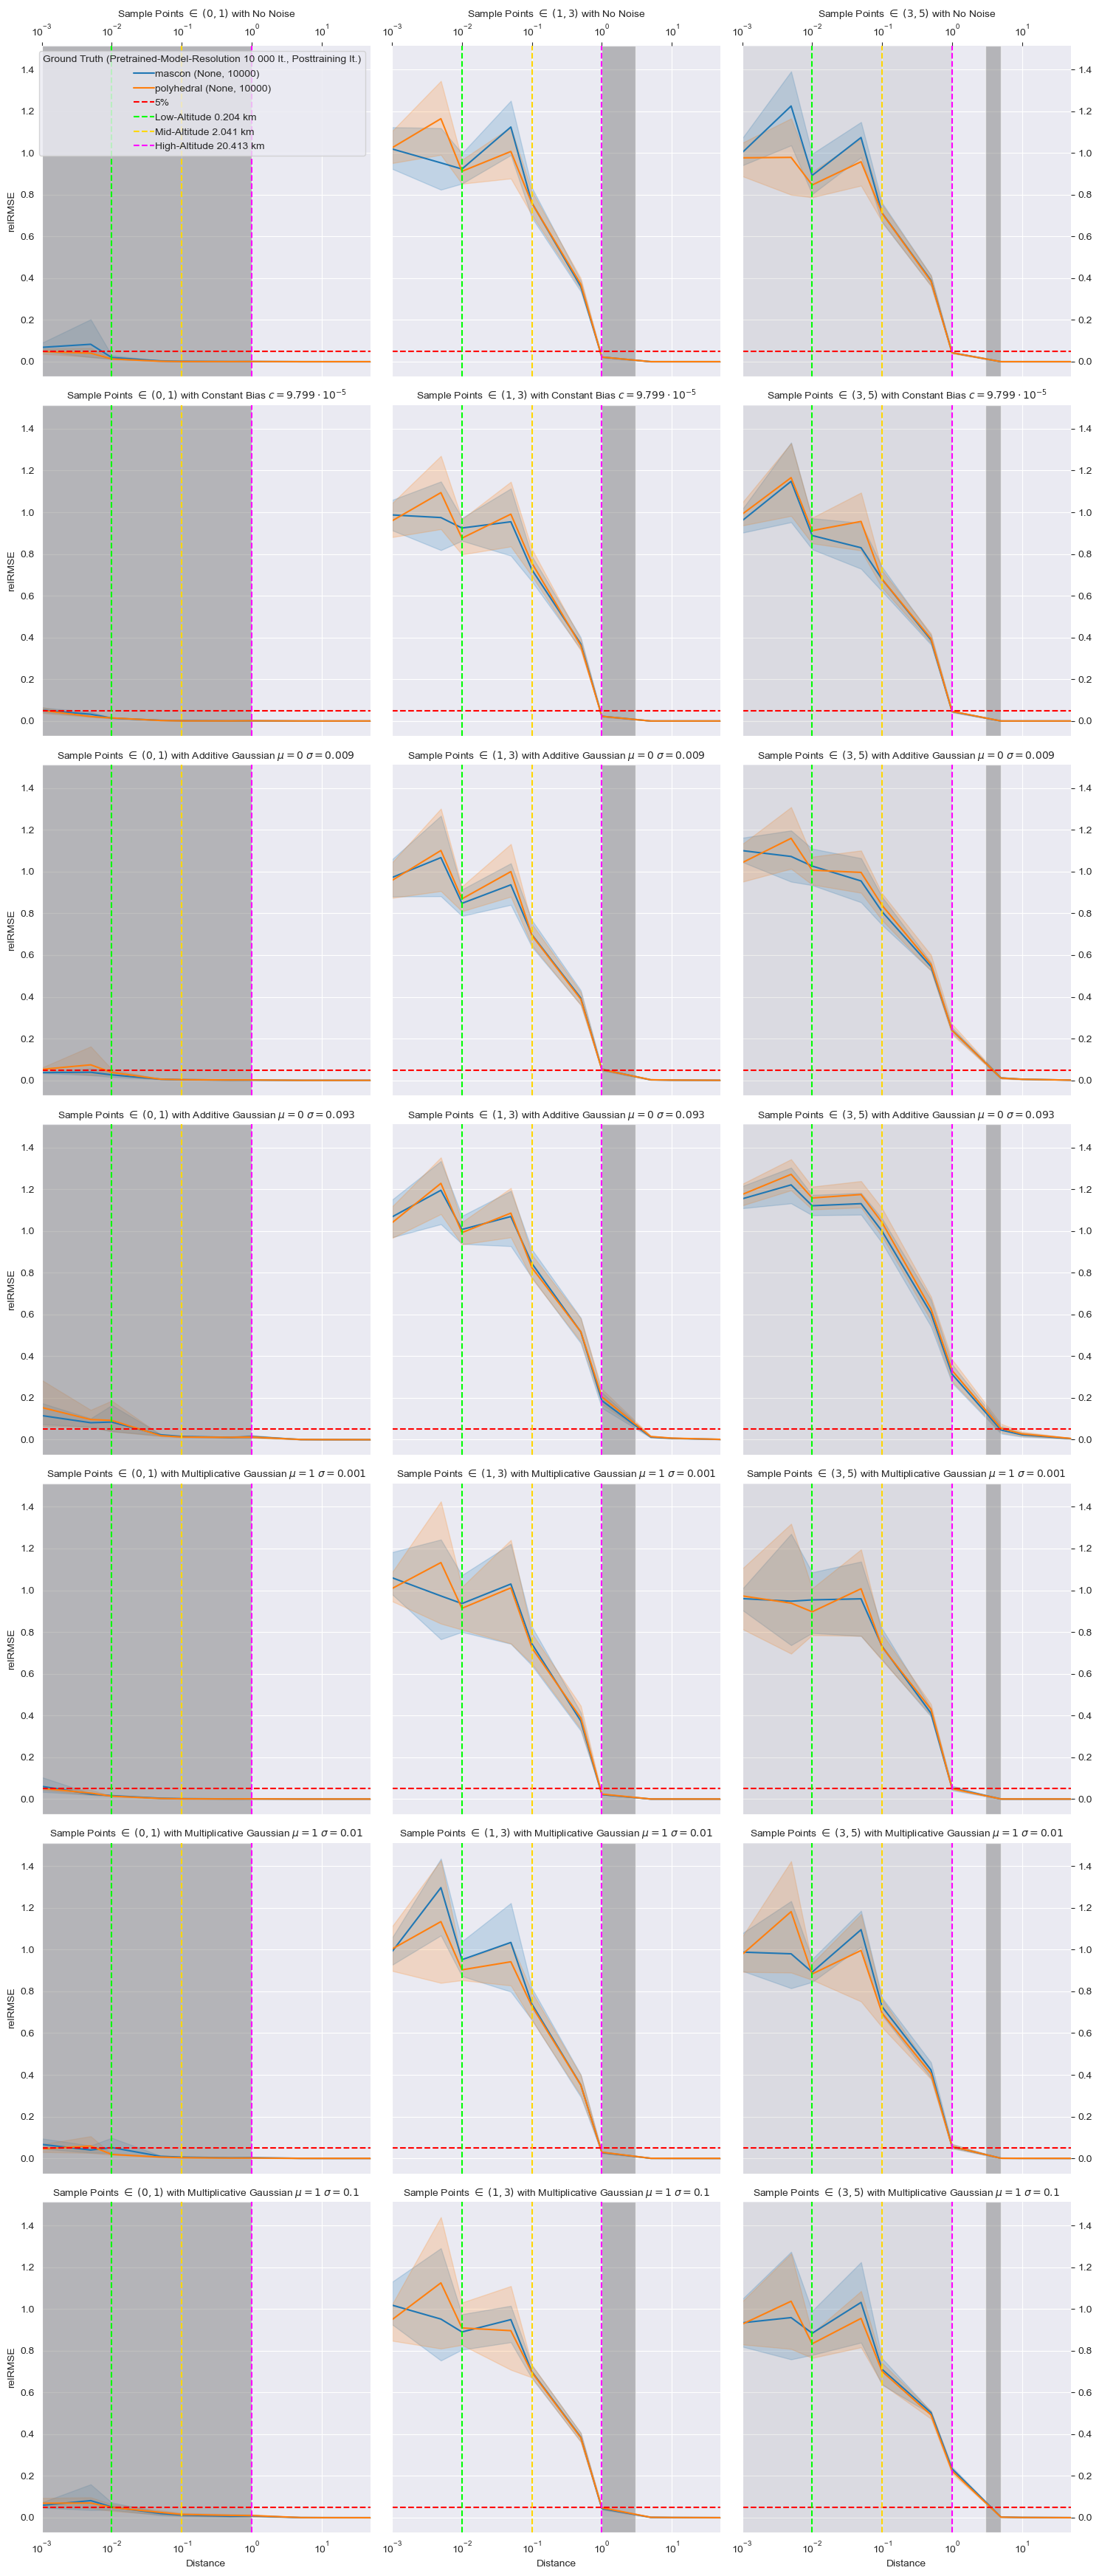

In [14]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=sorted(sample_distance_replacement.values()),
    row_order=noise_replacement.values(),
    hue="training_type",
    facet_kws=dict(legend_out=False)
)

g.set_titles("Sample Points $\in$ {col_name} with {row_name}")


g.set(xlim=(0.0, 50.0), xscale='log')#, yscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")

g.map(plt.axvline, x=0.01, ls='--', c='lime', label="Low-Altitude 0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="Mid-Altitude 2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="High-Altitude 20.413 km")

for ax in g.axes[0,:]:
    ax.tick_params(top=True, labeltop=True, labelrotation=0)
    ax.set_xlabel("Distance")
    ax.xaxis.set_label_position('top')
for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)
    ax.axvspan(0.0, 1.0, facecolor='gray', alpha=0.15)
    ax.tick_params(right=True, labelright=True, labelrotation=0)

g.legend.remove()
g.add_legend(handletextpad=0.1, title="Ground Truth (Pretrained-Model-Resolution 10 000 It., Posttraining It.)")
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

In [132]:
# g = sns.catplot(
#     data=dfm, kind="bar",
#     x="Distance", y=error_of_interest, col="sample_domain", row="noise",
#     col_order=["[0. 1.]", "[1. 3.]", "[3. 5.]"],
#     row_order=["['']", "['gaussian', 0.0, 0.146731]", "['gaussian', 0.0, 1.467314]",
#                "['constant_bias', [0.000272, 0.0, 0.0]]", "['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",
#                "['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]"],
#     hue_order=["polyhedral", "mascon"],
#     hue="ground_truth"
# )
# g.map(plt.axhline, y=0.05, ls='--', c='red')
# # g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# # g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
# g.tight_layout()
# save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_bar.png")
# g.savefig(save_path, dpi=300)

ValueError: Could not interpret input 'ground_truth'

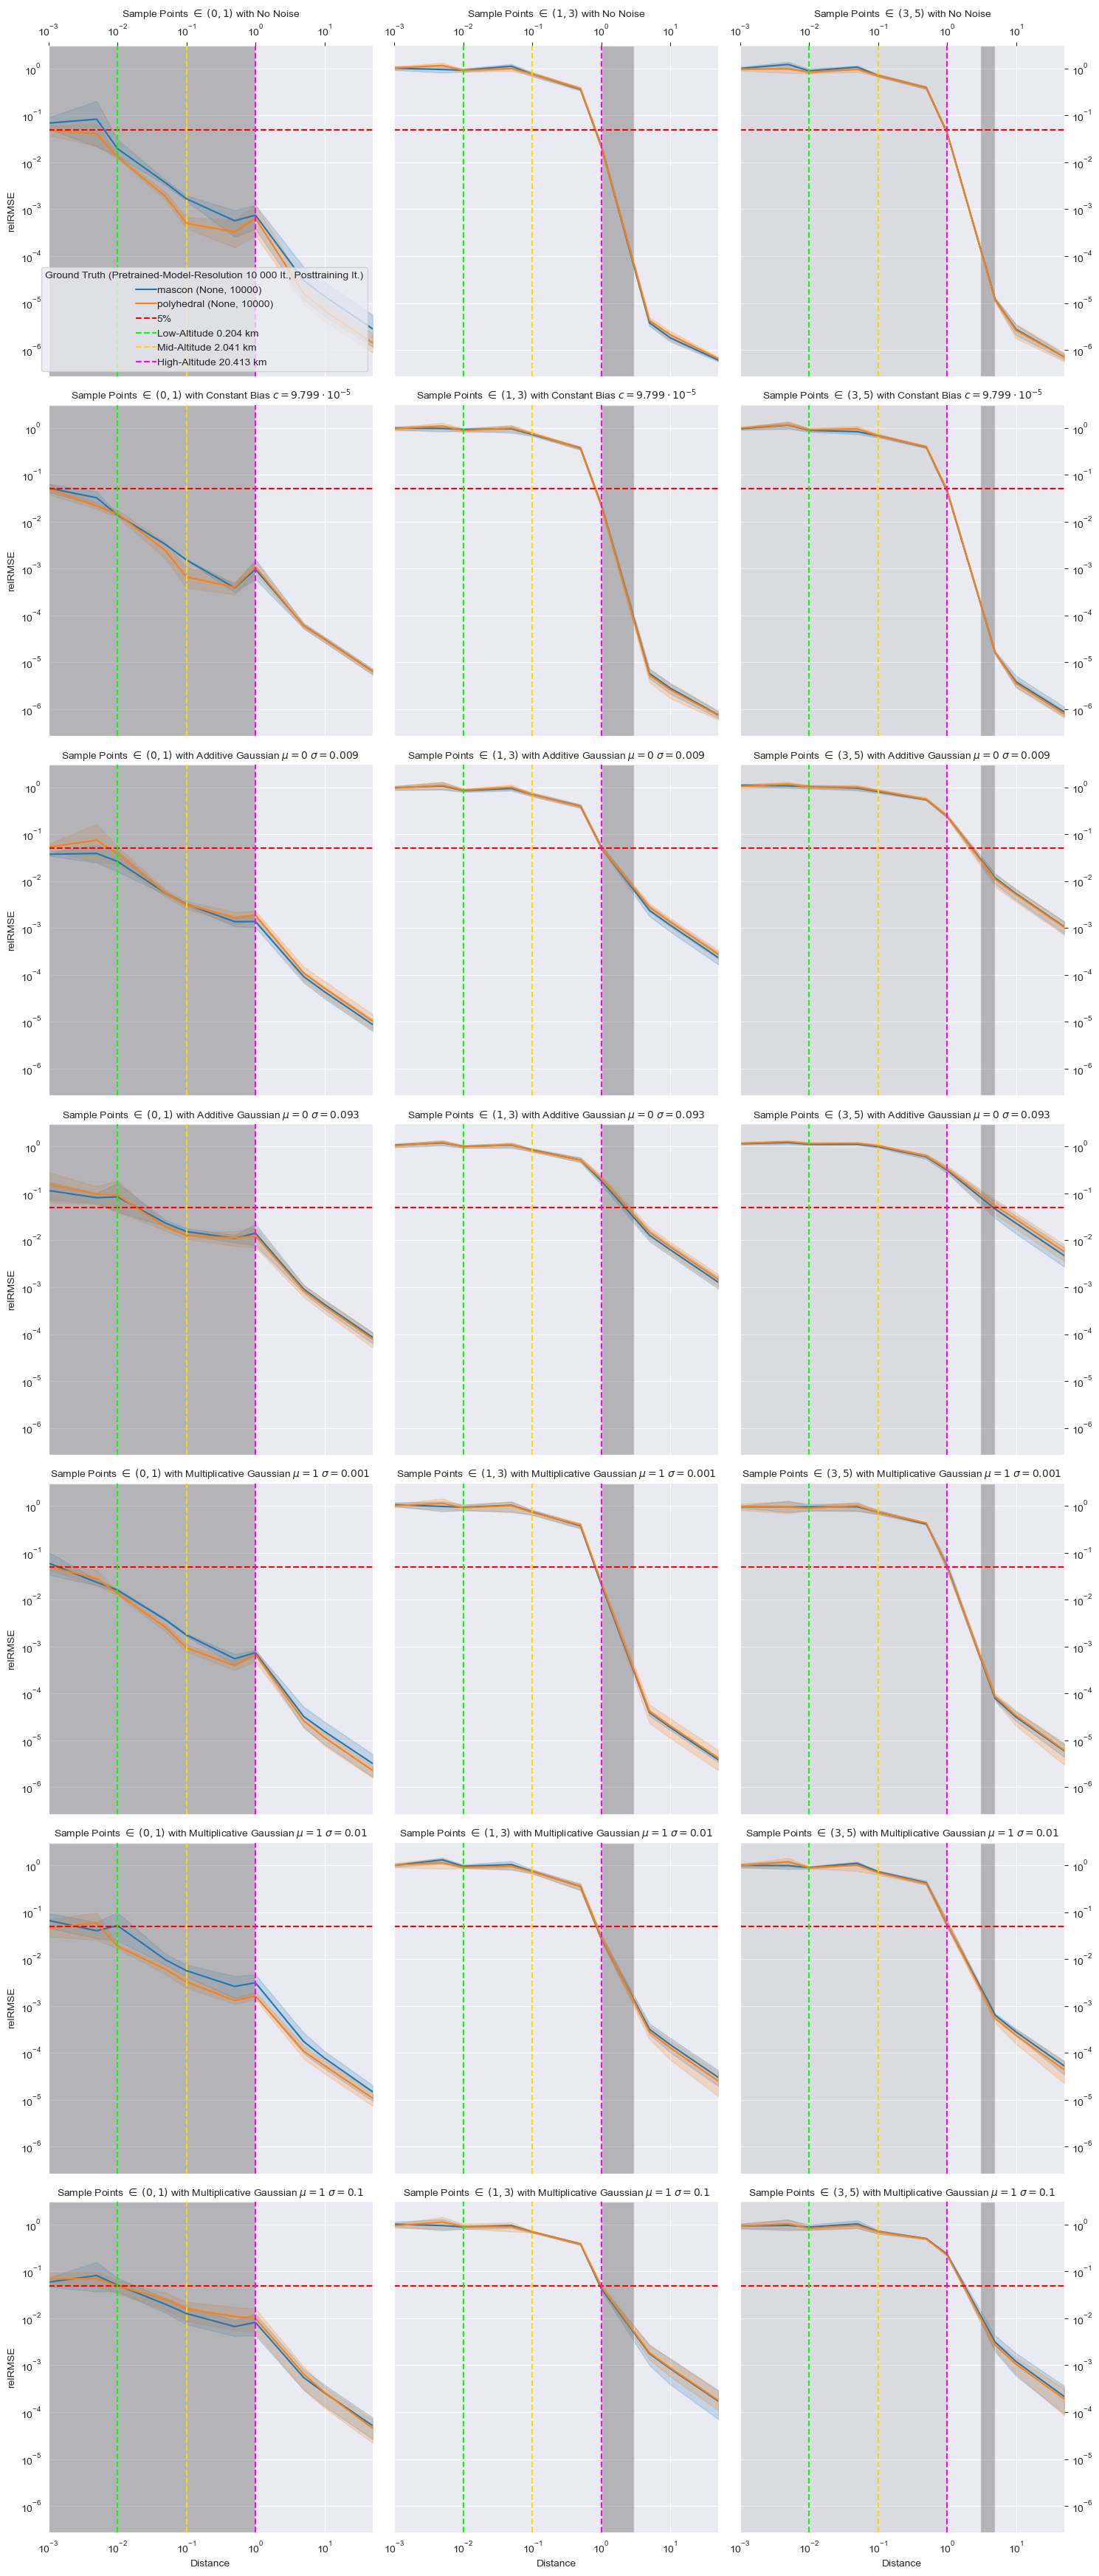

In [15]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=sorted(sample_distance_replacement.values()),
    row_order=noise_replacement.values(),
    hue="training_type",
    facet_kws=dict(legend_out=False)
)

g.set_titles("Sample Points $\in$ {col_name} with {row_name}")


g.set(xlim=(0.0, 50.0), xscale='log', yscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.01, ls='--', c='lime', label="Low-Altitude 0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="Mid-Altitude 2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="High-Altitude 20.413 km")



for ax in g.axes[0,:]:
    ax.tick_params(top=True, labeltop=True, labelrotation=0)
    ax.set_xlabel("Distance")
    ax.xaxis.set_label_position('top')
for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)
    ax.axvspan(0.0, 1.0, facecolor='gray', alpha=0.15)
    ax.tick_params(right=True, labelright=True, labelrotation=0)

g.legend.remove()
g.add_legend(handletextpad=0.1, title="Ground Truth (Pretrained-Model-Resolution 10 000 It., Posttraining It.)")
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_line_log.png")
g.savefig(save_path, dpi=300)

## Analysis of the pretraining results


In [181]:
df = df_copy.copy()

# Select from df where pretrained_model is None, and sample_domain is [0.0, 1.0], and noise is ['']
df = df.loc[(df["ground_truth"] == "polyhedral") & (df["sample_domain"] == "[0.0, 1.0]") & (df["noise"] == "['']")]

df = df[interesting_columns]

In [182]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,churyumov-gerasimenko,None,2023,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464906,0.451826,0.517527,0.396562,0.329448,0.103043,0.062150,0.015749,0.008338,1.742323e-03
1,churyumov-gerasimenko,None,42,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478600,0.472800,0.474701,0.401489,0.324469,0.103753,0.062361,0.015831,0.008355,1.757146e-03
2,churyumov-gerasimenko,None,1999,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.467474,0.452431,0.570987,0.391071,0.328477,0.103552,0.062586,0.015889,0.008337,1.753712e-03
3,churyumov-gerasimenko,None,433,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.475617,0.472834,0.478239,0.395436,0.325620,0.103527,0.062006,0.015869,0.008348,1.742616e-03
4,churyumov-gerasimenko,None,9,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478060,0.467077,0.451270,0.394462,0.327116,0.103045,0.063098,0.015793,0.008359,1.738641e-03
5,churyumov-gerasimenko,None,37,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.465664,0.459657,0.470242,0.396847,0.328892,0.104346,0.062988,0.015752,0.008304,1.745896e-03
6,churyumov-gerasimenko,None,3,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464653,0.461133,0.477853,0.399477,0.328099,0.103878,0.062782,0.015844,0.008324,1.742061e-03
7,churyumov-gerasimenko,None,7,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.460479,0.463982,0.461303,0.395540,0.330322,0.104430,0.062813,0.015865,0.008328,1.750702e-03
8,churyumov-gerasimenko,None,67,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.466892,0.475299,0.489632,0.395335,0.327961,0.100603,0.063098,0.015733,0.008276,1.733406e-03
9,churyumov-gerasimenko,None,99,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.476139,0.457829,0.474786,0.397273,0.329882,0.103737,0.062244,0.015776,0.008308,1.736266e-03


In [183]:
df.drop(columns=["sample", "iterations", "seed", "integration_points"], inplace=True)
df.groupby(["resolution"]).mean()

,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
resolution,,,,,,,,,,
0.1%,0.469848,0.463487,0.486654,0.396349,0.328028,0.103391,0.062613,0.015810,0.008328,0.001744
1%,0.112039,0.109445,0.095038,0.057496,0.043482,0.017017,0.010154,0.002549,0.001357,0.000288
10%,0.056727,0.036161,0.020256,0.004379,0.002057,0.001031,0.000894,0.000076,0.000037,0.000007
100%,0.058438,0.041732,0.022997,0.003187,0.001138,0.000740,0.000629,0.000056,0.000029,0.000006


In [184]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["resolution"], str_altitudes, var_name="Distance", value_name=error_of_interest)

dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))

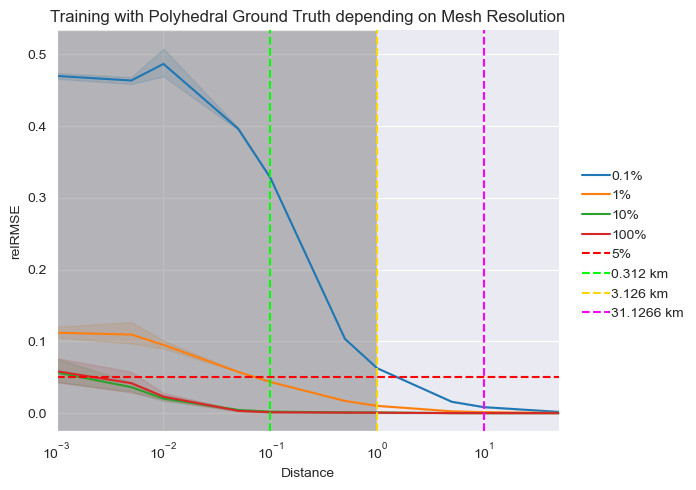

In [185]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest,
    hue="resolution"
)
g.set(xlim=(0.001, 50.0), xscale='log',
      title="Training with Polyhedral Ground Truth depending on Mesh Resolution")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.01, ls='--', c='lime', label="Low-Altitude 0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="Mid-Altitude 2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="High-Altitude 20.413 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_mesh_resolution_comparison_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

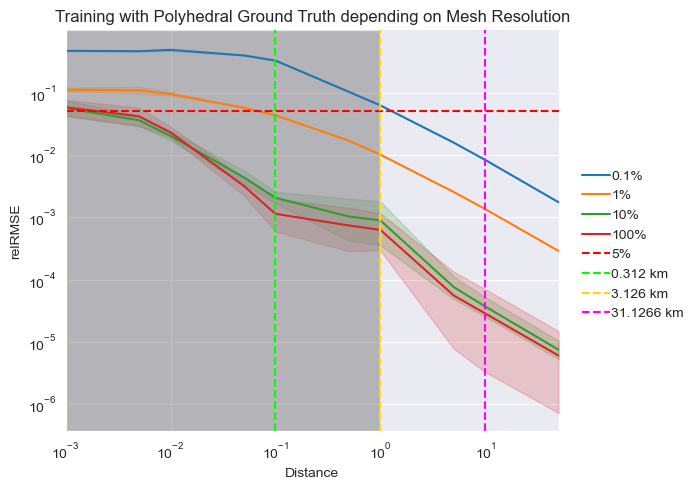

In [186]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest,
    hue="resolution"
)
g.set(xlim=(0.001, 50.0), xscale='log', yscale='log',
      title="Training with Polyhedral Ground Truth depending on Mesh Resolution")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_mesh_resolution_comparison_norm_{error_of_interest}_log_line.png")
g.savefig(save_path, dpi=300)